Please complete the notebook `02-functions.ipynb` before starting this one.

Before we start, run the code cell below for a nicer layout.

In [1]:
%%html
<style>
h1 { margin-top: 3em !important; }
h2 { margin-top: 2em !important; }
#notebook-container { 
    width: 50% !important; 
    min-width: 800px;
}
</style>

<h1>Book classifications with kNN</h1>

We continue with our artificial book dataset. In class we saw how a distance metric (in this case over the two rating columns `old` and `young`) can be used to <i>cluster</i> books. In our example, those clusters reflected the underlying genre of the books pretty well.

There is a related task in data analysis: the <i>classification</i> of data according using an already existing dataset. The <i>classes</i> in our dataset are the six genres (fantasy, sci-fi, comics, horror, romance, history) and the <i>features</i> are the ratings. The classification task in our case can be summarized as follows:

> Given a rating pair (`old`,`young`) of a book that is not in our database, decide a genre classification using the existing dataset.

Again, the notion of a <i>distance</i> or <i>metric</i> is the key to solve this task: the idea is that we can deduce the genre of a book by looking at books that have similar (close) ratings. Let us call the
book whose genre we want to determine the <i>query</i>. A $k$NN-classifier finds the $k$ points closest of the query and decides the label (genre) of the query depending on the labels (genres) it sees among those $k$ entries of our dataset. The simplest decision algorithm here is a <b>majority vote</b>: we assign the genre that appears the most time among those $k$ neighbours.

The task in the notebook is to implement this kind of classifier!

Let's load the dataset first:

In [2]:
# Copy your solution from `02-functions.ipynb` to load the 
# book dataset. Make sure that this notebook (`02-knn.ipynb`) is
# located in the same folder as `02-functions.ipynb`.
# Don't forget to import pandas!
import pandas as pd
books = pd.read_csv("02-resources/books.csv", index_col=0)

We will again use the Euclidean distance between book ratings. Import your implementation of `rating_dist` from Task 4 in `02-functions.ipynb` and put it in the next cell:

In [3]:
# Put your implementation of `rating_dist` here and run the cell
import math
def rating_dist(ratingA, ratingB):
    return math.sqrt(((ratingB[0] - ratingA[0])**2)+((ratingB[1] - ratingA[1])**2))

In [4]:
def nearest(bkind,hmany):
    x=[]
    ratings = books[['old', 'young']]
    for i, row in books.iterrows():
        x +=  [(rating_dist(ratings.iloc[bkind],ratings.iloc[i]), i)]
    x.sort()
    return x[1:(hmany+1)]
        
nearest(114, 9)

[(1.0, 353),
 (4.242640687119285, 383),
 (4.47213595499958, 298),
 (4.47213595499958, 321),
 (5.0, 201),
 (5.0990195135927845, 164),
 (5.830951894845301, 246),
 (6.082762530298219, 226),
 (6.082762530298219, 391)]

In [5]:
def nearest1(bkind,hmany):
    x=[]
    ratings = books[['old', 'young']]
    for i, row in books.iterrows():
        x +=  [(rating_dist(ratings.iloc[bkind],ratings.iloc[i]), i)]
    x.sort()
    for i in x[1:(hmany+1)]:
        print(books.iloc[(i[1])]['title'])
        print(x)
        
nearest1(114, 9)

The story of pirate Monica
[(0.0, 114), (1.0, 353), (4.242640687119285, 383), (4.47213595499958, 298), (4.47213595499958, 321), (5.0, 201), (5.0990195135927845, 164), (5.830951894845301, 246), (6.082762530298219, 226), (6.082762530298219, 391), (6.708203932499369, 272), (7.211102550927978, 80), (8.0, 198), (8.06225774829855, 53), (8.06225774829855, 398), (8.54400374531753, 12), (8.602325267042627, 211), (9.055385138137417, 17), (9.899494936611665, 368), (10.0, 85), (10.04987562112089, 359), (10.198039027185569, 50), (10.198039027185569, 257), (10.816653826391969, 45), (11.180339887498949, 295), (11.40175425099138, 239), (11.40175425099138, 251), (11.40175425099138, 370), (11.661903789690601, 43), (11.661903789690601, 357), (11.704699910719626, 121), (12.083045973594572, 294), (12.36931687685298, 382), (13.152946437965905, 328), (13.341664064126334, 125), (13.601470508735444, 15), (13.92838827718412, 89), (14.0, 252), (14.035668847618199, 282), (14.317821063276353, 346), (15.0, 119), (1

In [18]:
def nearestG(bkind,hmany):
    x=[]
    ratings = books[['old', 'young']]
    for i, row in books.iterrows():
        x +=  [(rating_dist(ratings.iloc[bkind],ratings.iloc[i]), i)]
    x.sort()
    for i in x[1:(hmany+1)]:
        print(books.iloc[(i[1])]['author'])#C
        
nearestG(114, 23)

Brandon Washington
Erin Love
Sandra Parker
Wendy Monroe
Elizabeth Austin
Eric Taylor
Victoria Mosley
Donna Luna
John Dorsey
Isaiah Roach
John Barton
Kristin Morton
Clarence Johnson
David Cole
Kimberly Harrison
Daniel Morrison
Jason Gordon
Aaron Washington
Jonathan Buckley
Melissa Hernandez
Jennifer Willis
Pamela Castaneda
Brittany Morales


Let us first implement a few useful methods to work with the `books` dataset. For simplicity we reference `books` as a global variable and do not pass it as a parameter to the function.

> Implement a method `find_genres(...)` that takes a list of indices and
returns the genres of each index in a list.

Your implementation should pass the tests in the subsequent cell.

In [7]:
def find_genres(indices):
    """ Return the genres of the books corresponding to the
    indices in the `books` database. """
    x = []
    for i in indices:
        x += [books.iloc[i]['genre']]
    return x
print(find_genres([0,1,2]))     

['fantasy', 'sci-fi', 'comics']


In [8]:
assert find_genres([0,1,2]) == ['fantasy', 'sci-fi', 'comics']
assert find_genres([42,144,50]) == ['history', 'romance', 'comics']
''.join([chr(ord(s)-1) for s in 'Fwfszuijoh(t!gjof'])

"Everything's fine"

As a first step, we implement a function that returns the $k$ nearest neighbours to a given query. This is similar to what you implemented in Task 5 of `02-functions.ipynb`, however, the query is a whole row of `books` (not just the rating). You should first figure out how to extract the ratings from the row.

> Implement the method `neighbours(...)` in the cell below. The exact functionality is described in the comment.

In [9]:
print(books.loc[1][['old','young']], 10)

old       6
young    43
Name: 1, dtype: object 10


    """
        BELOW:
        Returns the k nearest neighbours of the query `rating` as
        a list of tupels (dist, i) where i is the index of the 
        corresponding row in `books` and dist is the computed distance
        to the query.
        The list is sorted by the first entry of the tuple 
        (from near to far).
    """

In [19]:
def neighbours(rating, k):
    x=[]
    ratings = books[['old', 'young']]
    for i, row in books.iterrows():
        x +=  [(rating_dist((rating), (ratings.iloc[i])), i)]
    x.sort()
    return x[1:(k+1)]#W
neighbours((80,20), 5)  


[(1.4142135623730951, 180),
 (2.23606797749979, 27),
 (2.23606797749979, 87),
 (2.8284271247461903, 396),
 (3.1622776601683795, 325)]

In [11]:
print(neighbours(books.loc[1][['old','young']], 10))
res = neighbours(books.loc[1][['old','young']], 10)
print(find_genres([i for _,i in res]))
res = neighbours((30,30), 5)
print(find_genres([i for _,i in res]) == ['fantasy', 'fantasy', 'sci-fi', 'fantasy', 'horror'])

[(0.0, 1), (0.0, 150), (2.0, 352), (2.8284271247461903, 158), (3.0, 347), (3.605551275463989, 173), (4.0, 194), (4.0, 358), (4.123105625617661, 81), (4.123105625617661, 240)]
['sci-fi', 'sci-fi', 'sci-fi', 'sci-fi', 'sci-fi', 'sci-fi', 'sci-fi', 'sci-fi', 'sci-fi', 'sci-fi']
True


In [12]:
res = neighbours(books.loc[1][['old','young']], 10)
assert find_genres([i for _,i in res]) == ['sci-fi']*10

res = neighbours((30,30), 5)
assert find_genres([i for _,i in res]) == ['fantasy', 'fantasy', 'sci-fi', 'fantasy', 'horror']

Now can put the pieces together: for a given query, we can compute the $k$ nearest neighbours and compute return the genre that appears the most among those neighbours.

> Implement the function `classify_majority` according to the specification in the comment below.

    """
        BELOW:
        Returns the majority genre among the k nearest neighbours
        of `query`. The parameter `query` contains the `old` rating
        in the first coordinate `query[0]` and the `young` rating
        in the second coordinate `query[1]`.
    """

In [13]:
from collections import Counter

def classify_majority(query, k):
    counter = Counter()
    for i in find_genres([i for _,i in neighbours(query, k)]):
        counter[i] +=1
    return(counter.most_common(1)[0][0])

    pass

**Note:  Both the cells above and below function the same...**

In [14]:
from collections import Counter

def classify_majority(query, k):
    counter = Counter()
    a = [i for _,i in neighbours(query, k)]
    b = find_genres(a)
    for i in b:
        counter[i] +=1
    return(counter.most_common(1)[0][0])

    pass

If you completed the implementation of `classify_majority`, the next cell will output a coloured plot of the books (small plus-shaped markers) alongside a set of queries (big round markers) as classified by your implementation. Try changing the queries
and the value of `k` and see how the plot changes.

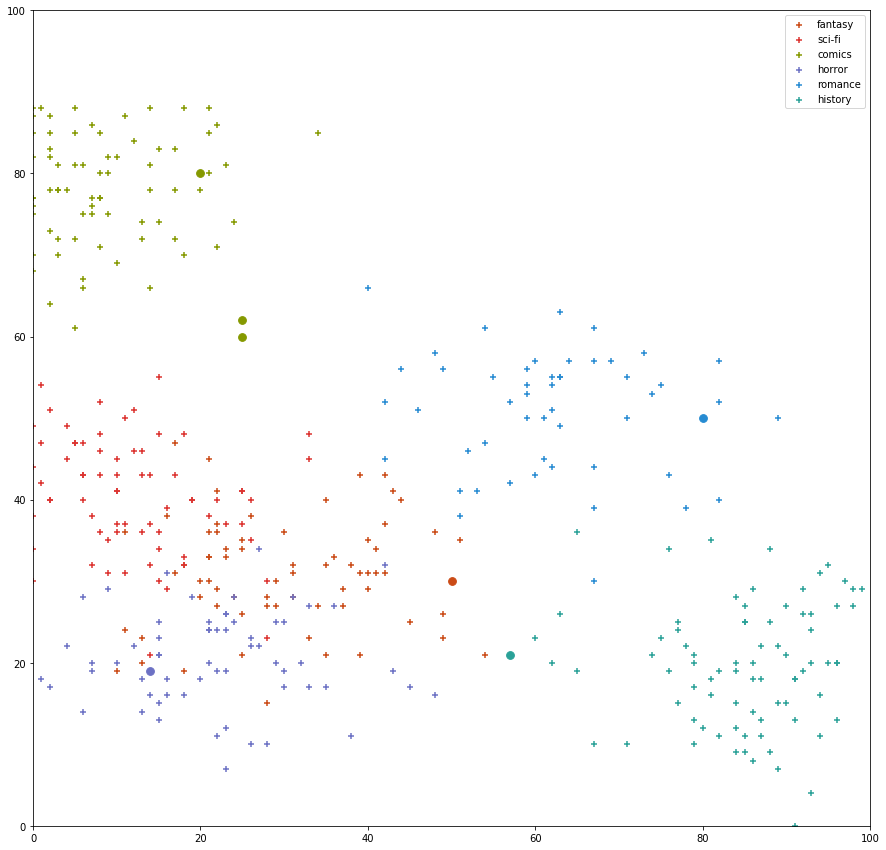

In [20]:
import matplotlib.pyplot as plt

queries = [(20,80), (50,30), (25,60), (25,62), (57,21), (80, 50), (14,19)]
k = 15

fig, ax = plt.subplots(figsize=(15,15))

genres = list(books['genre'].unique())
colors = "#cb4b16;#dc322f;#859900;#6c71c4;#268bd2;#2aa198;".split(';')
colmap = dict(zip(genres, colors))
for genre, col in colmap.items():
    sub = books[books['genre'] == genre]
    ax.scatter(sub['old'], sub['young'], label=genre, marker='+', color=col, s=30)
    
for q in queries:
    genre = classify_majority(q, k)
    ax.scatter([q[0]], [q[1]], color=colmap[genre], marker='o', s=60)
    
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.legend()